In [1]:
import pandas as pd
from mplsoccer import Pitch, VerticalPitch
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt

import cmasher as cmr

import numpy as np

In [2]:
df = pd.read_excel(f"Heatmap SB/centre/Tableaux/2023_2024.xlsx", index_col = 0)

In [4]:
bin_statistic.keys()

dict_keys(['statistic', 'x_grid', 'y_grid', 'cx', 'cy', 'binnumber', 'inside'])

In [ ]:
bin_statistic["binnumber"]

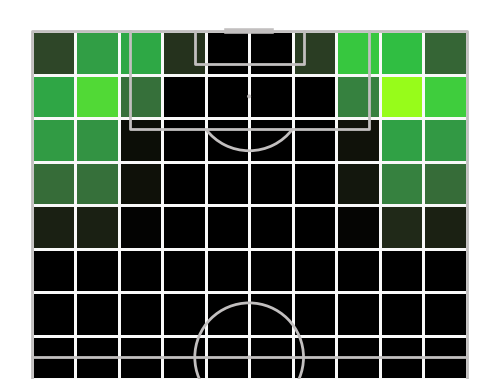

In [3]:
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()]
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0', line_color = "#C2BFBF", half = True)
fig, ax = pitch.draw(constrained_layout=True, tight_layout=False)
fig.set_facecolor("none")
ax.set_facecolor("none")
fig.set_edgecolor("none")
bin_statistic = pitch.bin_statistic(df.x, df.y, statistic='count', bins=(15, 10), normalize=True)
pitch.heatmap(bin_statistic, ax = ax, cmap = cmr.nuclear, edgecolor='#f9f9f9')
# mask = np.logical_and(bin_statistic['binnumber'][0] == 13, bin_statistic['binnumber'][1] == 8)

In [11]:
bin_statistic["cy"].ravel().shape

(150,)

In [12]:
import plotly.express as px

fig = px.scatter(bin_statistic["cx"].ravel(), bin_statistic["cx"].ravel())

fig.show()

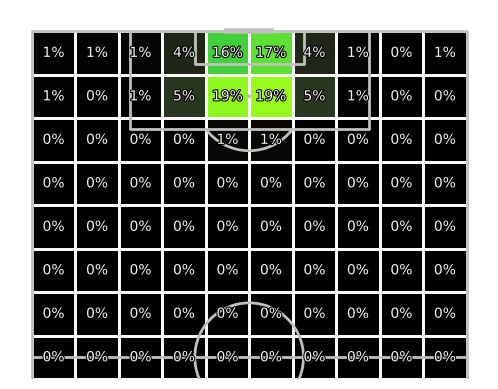

In [28]:
fig3, ax3 = pitch.draw(constrained_layout=True, tight_layout=False)
fig3.set_facecolor("none")
ax3.set_facecolor("none")
fig3.set_edgecolor("none")
bin_statistic3 = pitch.bin_statistic(df.x_end, df.y_end, statistic='count', bins=(15, 10), normalize=True)
pitch.heatmap(bin_statistic3, ax = ax3, cmap = cmr.nuclear, edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic3, color='#f4edf0', ax = ax3, ha='center', va='center', str_format='{:.0%}', path_effects=path_eff)